In [6]:
import pandas as pd
import csv as csv
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import seaborn as sns

<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h1 id="title">Molecular orbital coupling interaction analysis</h1>
<h2 id="title"> Löwdin Population analysis from </h2>
<h2 id="title"> X-ray absorption spectra calculated using PNO-DFT/ROCIS zora </h2>
<h3 id="title">    System of study: F ${---}$ Y</h3>
<h4 id="title">   non-covalent interaction distances varying from 2,5 to 11,0 $\dot{A}$ </h4>
</body>
</html>




#### Loading matrices (data from the pipeline's outputs)
Data in .csv format
##### residue called as A is acting as one at the ground state amino acid
> ##### resA core MO
##### residue called as B is acting as one at the virtual state amino acid
> ##### resB virtual MO

In a pair-aa interaction, e.g. Phe-Tyr, Phenylalanine stands for resA core MO and Tyrosine for resB virtual MO. And after, Tyrosine stands for resA core MO and Phenylalanine for resB virtual MO. Both are calculated and are within the spectra.

> ##### resA core MO - Phenylalanine

In [8]:
# naming global variables
resa_A = "resA_MOcore_FY_"
resb_B="resB_MOcore_FY_"
resab_AB="corevirtMO_matrix_FY_"
resab_ts_AB = "corevirtMO_matrix_tspb_FY_"
resab_fosce_AB="corevirt_fosce_FY_" 
# naming the variables that externally are called
post = ".csv"
sffx = "_FY_raw"
fx = "_FY"
mocr_pre = "resa_mocore_"
movr_pre = "resb_movirt_"
mocrvr_pre = "corevirtMO_matrix_"
mocv_pre_tspb = "corevirtMO_matrix_tspb_"
mocv_pre_fosce = "corevirt_mo_fosce_"

In [9]:
# ccreating list for the distances
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)

In [10]:
# loading data from core MO matrices

In [11]:
#Uncomment the original range to see more peaks outside the expected range
for ii in list_suf:
    # core MO
    globals()['%s' % mocr_pre+str(ii)+sffx] = pd.read_csv(resa_A+str(ii)+post, delimiter=',', index_col='num-1')
    # virtual MO
    globals()['%s' % movr_pre+str(ii)+sffx] = pd.read_csv(resb_B+str(ii)+post, delimiter=',', index_col='num-1')
    # core/virt MO as function of the number of transitions
    globals()['%s' % mocrvr_pre+str(ii)+sffx] = pd.read_csv(resab_AB+str(ii)+post, delimiter=',', index_col='virt\core')
    # core/virt MO as function of the number of transitions averaged probability
    globals()['%s' % mocv_pre_tspb+str(ii)+sffx] = pd.read_csv(resab_ts_AB+str(ii)+post, delimiter=',', index_col='virt\core')
    # core/virt MO as function of the oscillator strength using electronic dipole moment as operator
    # by weighted (WSM) sum and weighted average (WAM)
    globals()['%s' % mocv_pre_fosce+str(ii)+sffx] = pd.read_csv(resab_ts_AB+str(ii)+post, delimiter=',', index_col='virt\core')

### Main functions to present data according to the features

In [12]:
# returning just columns in the both lists intersection
def selecting_atm_matrix(df, atoms_list):
    """
    it returns MO matrix (df) having just the atoms in atoms_list.
    """
    col_list = df.index.tolist() #listing index (elements from column 0)
    #dff = df.loc[:, (df != 0).any(axis=0)] #removing zero columns
    return df.loc[[i for i in atoms_list if i in col_list]] 

In [13]:
# removing zero columns
def nonzero_mo_matrix(df):
    """
    it returns MO matrix (df) having just non-zero MO population.
    """
    return df.loc[:, (df != 0).any(axis=0)]

In [14]:
# showing the fisrt two columns and those having population greater than pop*100%
def crop_by_loewdin_p(df,pop):
    """
    it returns MO matrix (df) having just a Loewdin MO population contribution greater than (100*pop)%.
    pop is a number between 0 and 1.
    """
    #cols = [col for col, val in df.sum()[2:].iteritems() if val > (pop*100)]
    cols = [col for col, val in df.sum()[2:].items() if val > (pop*100)]
    #iteritem() create a zip with the index_col and the values
    cols.insert(0,'lvl')
    cols.insert(0,'sym')
    #to add on the top the first two columns removed in the previous sum() evaluation
    return df[cols] 

In [15]:
# the first two elements in df2.axes[1] and df1.axes[1] are "sym" and "lvl", 
# that's why I used df.axes[1][2:]
def cropping_matrix(df, df1, df2):
    """
    it returns a cropped MO matrix from df using as parameters the indices in df1 and df2.
    df1 index are column names from df and df2 index are the rows from df
    """
    try:
        dff = df[df1.axes[1][2:].tolist()] #saving specific columns
    except KeyError:
        tmp_mo = [item for item in df1.axes[1][2:].tolist() if item in df.axes[1][0:].tolist()]
        #removing items in the first list that are not in the second one
        dff = df[tmp_mo]
    try:
        return dff.loc[[int(i) for i in df2.axes[1][2:].tolist()]] #returning specific rows
    except KeyError:
        tmp_mo2 = [item for item in df2.axes[1][2:].tolist() if int(item) in dff.T.axes[1][0:].tolist()]
        # dff.T to obtain the index_col as the head row
        return dff.loc[[int(i) for i in tmp_mo2]] #returning specific rows

<html>
<body>
<h3 id="title">Reducing Löwdin Population MO matrices by removing non-contributing MO</h3>
</body>
</html>

In [16]:
for ii in list_suf:
    # Case for core MO in the resA
    globals()['%s' % mocr_pre+str(ii)+fx] = nonzero_mo_matrix(globals()['%s' % mocr_pre+str(ii)+sffx])
    # Case for virtual MO in the resB
    globals()['%s' % movr_pre+str(ii)+fx] = nonzero_mo_matrix(globals()['%s' % movr_pre+str(ii)+sffx])

________________________________________

### varying loewdin population involved

In [17]:
loew_pop_list = [ii for ii in range(1,101,2)]
len(list_suf)

62

In [18]:
atomAi = 0
atomAf = 22
atomBi = 23
atomBf = 46

### BGA product

In [19]:
def ts_psb_acore_bvirt(acore, bvirt, abcorevirt, atm_to_virtmo=False):
    """
    Do a matrix multiplication between the core-to-virt transition 
    probabilities matrix and the core MO matrix, then the resulting matrix
    is multiplied by the virtual MO matrix.
    if atm_to_virtmo is True, then the two resulting matrices in the 
    multiplication process are returned.
    By the default, just the last matrix is returned.
    """
    abcorevirt.index = abcorevirt.index.astype('str') 
    #to make possible the dot product in pandas, the indexes involved in each
    #product have to "match" in name and type
    
    i = j = 0
    dff = pd.DataFrame(np.zeros((acore.shape[0], abcorevirt.shape[0])), \
                       index=acore.index, columns=abcorevirt.index)
    for j in range(abcorevirt.shape[1]):
        for i in range(acore.shape[1]):
            try:
                dff += acore.T[i:i+1].T.dot(abcorevirt.iloc[:].T[j:j+1])
            except:
                pass
            
    dff = dff/100
    i = j = 0
    dff2 = pd.DataFrame(np.zeros((dff.shape[0], bvirt.shape[0])), \
                        index=dff.index, columns=bvirt.index)
    for i in range(dff.shape[1]):
        for j in range(bvirt.shape[1]):
            try:
                dff2 += dff.T[i:i+1].T.dot(bvirt.T[j:j+1])
            except:
                pass
    
    if atm_to_virtmo:
        return dff, dff2
    else:
        return dff2

In [20]:
def sum_Mm(dfbig, dfsmall):
    """
    in a dfbig matrix, the elements from dfsmall matrix are summed according
    to its index and columns matches in dfbig index and columns
    values
    """
    for i in dfsmall.index.values:
        for j in dfsmall.columns.values:
            try:
                dfbig.loc[[i],[j]] += dfsmall.loc[[i],[j]]
            except:
                pass
    return dfbig

### 1% or greater distinguishable MO (non-distinguishable)

In [21]:
for pop in loew_pop_list[0:1]: 
    
    for ii in list_suf:
        globals()['core_%s_AB' % str(ii)] = selecting_atm_matrix(globals()['resa_mocore_%s_FY' % str(ii)],\
                                            [i for i in range(atomAi,atomAf+1)])
        globals()['virt_%s_AB' % str(ii)] = selecting_atm_matrix(globals()['resb_movirt_%s_FY_raw' % str(ii)],\
                                            [i for i in range(atomBi,atomBf+1)])
        globals()['core_%s_BA' % str(ii)] = selecting_atm_matrix(globals()['resa_mocore_%s_FY' % str(ii)],\
                                            [i for i in range(atomBi,atomBf+1)])
        globals()['virt_%s_BA' % str(ii)] = selecting_atm_matrix(globals()['resb_movirt_%s_FY_raw' % str(ii)],\
                                            [i for i in range(atomAi,atomAf+1)])
    
    for ii in list_suf:
        #Remember: it does not make scence cropping by loewdin population if the target virtual space
        #is complete (all atoms) because the answer always will be close to 100% of contribution!!!
        #globals()['resb_movirt_%s_all_pop' % str(ii)] = \
        #crop_by_loewdin_p(globals()['resb_movirt_%s_FY_raw' % str(ii)],pop/100)
        globals()['resb_movirt_%s_FY_pop' % str(ii)] = \
        crop_by_loewdin_p(globals()['virt_%s_AB' % str(ii)],pop/100)
        globals()['resb_movirt_%s_YF_pop' % str(ii)] = \
        crop_by_loewdin_p(globals()['virt_%s_BA' % str(ii)],pop/100)
    ###
    for ii in list_suf:
        #to obtain a complete coretovirt-atom matrix the function crop_by_loewdin_p() is not necessary
        globals()['corevirtMO_matrix_tspb_%s_all_pop' % str(ii)] = \
        cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], \
                        globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_raw' % str(ii)])
        #here it is necessary a cropped virtual space
        globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)] = \
        cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], \
                        globals()['core_%s_AB' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
        globals()['corevirtMO_matrix_tspb_%s_YF_pop' % str(ii)] = \
        cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], \
                        globals()['core_%s_BA' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])

### Building the atomistic oscillator strength matrices

In [22]:
# naming global variables
resa_A = "resA_MOcore_FY_"
resb_B="resB_MOcore_FY_"
resab_AB="corevirtMO_matrix_FY_"
resab_ts_AB = "corevirtMO_matrix_tspb_FY_"
resab_fosce_AB="corevirt_fosce_FY_" 
# naming the variables that externally are called
post = ".csv"
sffx = "_FY_raw"
fx = "_FY"
mocr_pre = "resa_mocore_"
movr_pre = "resb_movirt_"
mocrvr_pre = "corevirtMO_matrix_"
mocv_pre_tspb = "corevirtMO_matrix_tspb_"
mocv_pre_fosce = "corevirt_mo_fosce_"

In [23]:
for ii in list_suf:
    globals()['newdf%s' % str(ii)] = \
    ts_psb_acore_bvirt(globals()['%s' % mocr_pre+str(ii)+fx].T[2:].T,\
                       globals()['%s' % movr_pre+str(ii)+fx].T[2:].T,\
                       globals()['%s' % mocv_pre_fosce+str(ii)+sffx])
    globals()['newdf%s' % str(ii)].index.names = ['core-atom']
    globals()['newdf%s' % str(ii)].columns.names = ['virtual-atom']
    globals()['newdf%s' % str(ii)] = \
    globals()['newdf%s' % str(ii)].apply(pd.to_numeric).sort_index(ascending=True)


### Defining maximum and minimum to plot as a.u.

In [24]:
other_list = [35, 45, 55, 65, 75, 95, 105]
relmax = max([globals()['newdf%s' % str(ii)].max().max() for ii in other_list])#list_suf])
relmin = min([globals()['newdf%s' % str(ii)].min().min() for ii in other_list])#list_suf])

### Heatmap plot

In [25]:
# seaborn

/tmp/ipykernel_11323/595137417.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


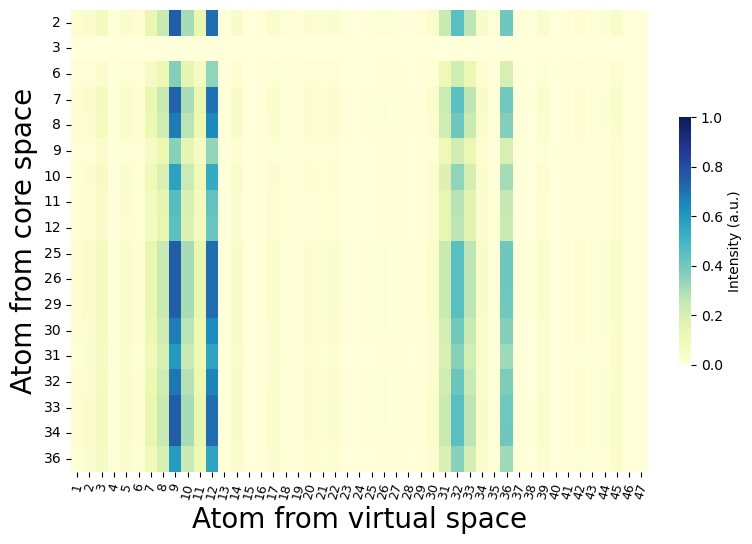

In [26]:
fig, ax = plt.subplots(figsize=(8,6)) 
test = (newdf42 - relmin)/(relmax - relmin)

s = sns.heatmap(test, annot=False, cmap='YlGnBu', vmin=0, vmax=1, ax=ax,\
                cbar_kws={'fraction' : 0.02, 'label': 'Intensity (a.u.)'}, \
           xticklabels=(test.columns.values+1).tolist(), \
                yticklabels=(test.index.values+1).tolist())
s.set_xlabel('Atom from virtual space', fontsize=20)
s.set_ylabel('Atom from core space', fontsize=20)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=10)
s.set_xticklabels(s.get_xticklabels(), rotation=75, 
                   fontweight='light', fontsize=9)
fig.show()
plt.savefig("afosce_heatmap_seaborn.svg", format="svg")

/tmp/ipykernel_11323/1328196704.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


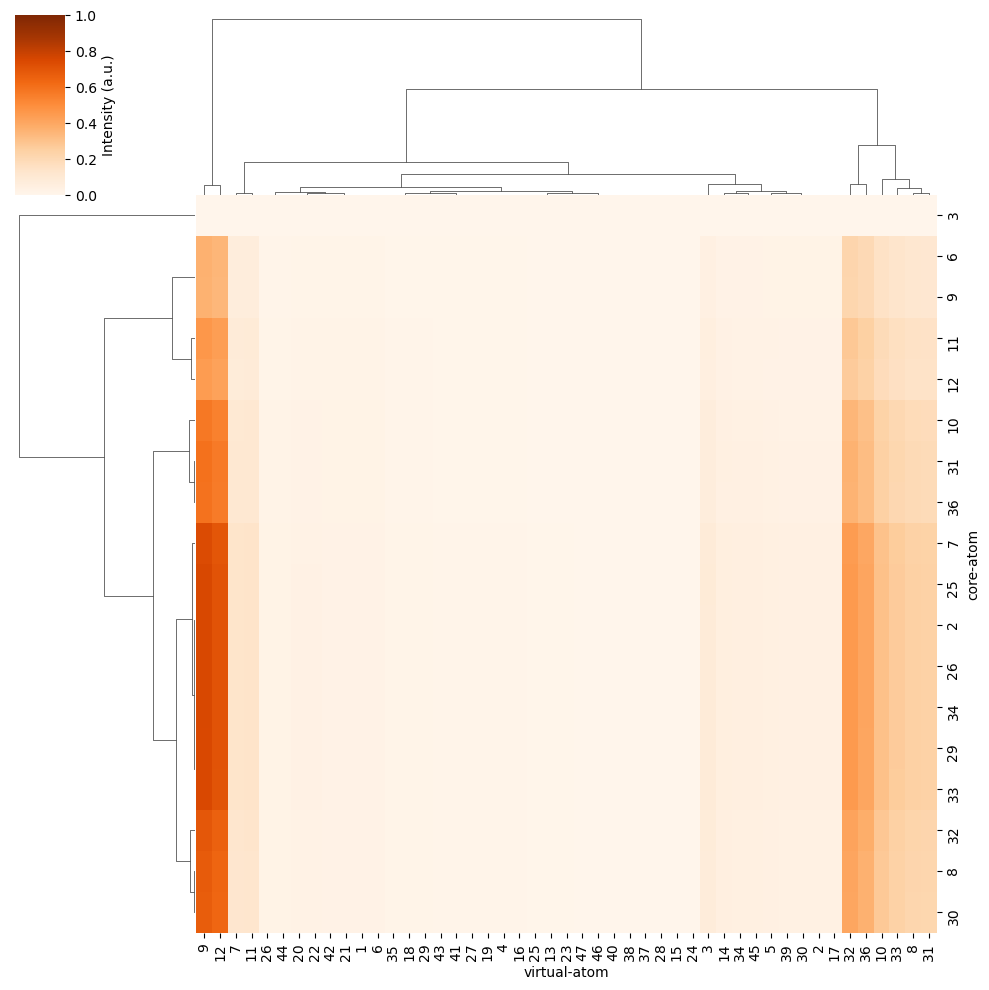

In [27]:
s = sns.clustermap(test, cmap = "Oranges", method="complete", metric="euclidean", \
                   vmin = 0, vmax = 1, \
                   cbar_kws={'fraction' : 0.01, 'label': 'Intensity (a.u.)'}, \
                   xticklabels=(test.columns.values+1).tolist(), \
                   yticklabels=(test.index.values+1).tolist())
#s.set_xlabel('Atom from virtual space', fontsize=20)
#s.set_ylabel('Atom from core space', fontsize=20)
#s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=10)
#s.set_xticklabels(s.get_xticklabels(), rotation=75, 
#                   fontweight='light', fontsize=9)
fig.show()

In [28]:
# ggplot or plotly

In [29]:
from plotnine import *
import plotly.express as px

In [30]:
# initializing pandas reordered as: 
atomis_fosc = pd.DataFrame(columns=['virtual-atom', 'core-atom', 'tr_intensity'])

In [31]:
test42 = test

In [32]:
dist = 42
auxdf = globals()['test%s' % str(dist)]
auxlist = auxdf.index.values.tolist()

for ii in auxlist:

    aux = auxdf[auxdf.columns.values.tolist()].loc[ii]
    dict = {"virtual-atom": aux.index.tolist(),
            "core-atom": aux.name,
            "tr_intensity": aux.values.tolist()}
    
    atomis_fosc = pd.concat([atomis_fosc, pd.DataFrame(dict)])
globals()['atomis_fosc%s' % str(dist)] = atomis_fosc

/tmp/ipykernel_11323/2578052200.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [33]:
#pd.DataFrame(dict)

In [34]:
atomis_fosc42

,virtual-atom,core-atom,tr_intensity
0,0,1,0.027119
1,1,1,0.040679
2,2,1,0.085878
3,3,1,0.009040
4,4,1,0.045199
...,...,...,...
42,42,35,0.007144
43,43,35,0.017859
44,44,35,0.039291
45,45,35,0.000000


In [35]:
#aux.values.tolist() #values
#aux.index.tolist() #index
#aux.name

In [36]:
matplotlib.get_cachedir()

'/home/mahecha/.cache/matplotlib'

/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


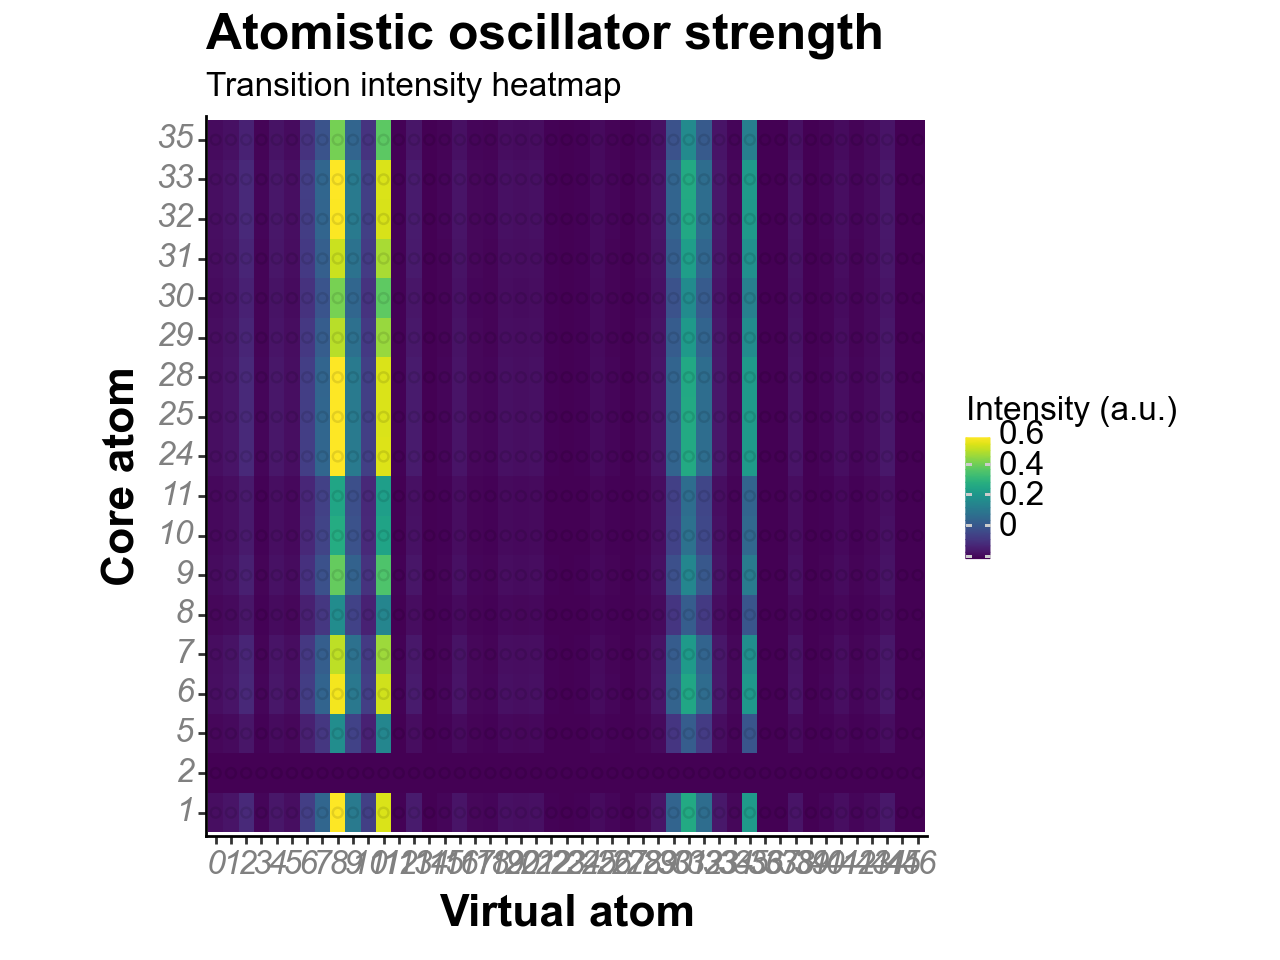

<Figure Size: (640 x 480)>

In [42]:
# We use 'factor(year)' -- a discrete -- instead of 'year' so that all the years
# are displayed along the x-axis.
# The .95s create spacing between the tiles.

(ggplot(atomis_fosc42, 
        aes('virtual-atom', 'core-atom', fill='tr_intensity'))
 + geom_tile(aes(width=1, height=1))
 + geom_point(alpha = 0.1)
 + theme_classic()
 + labs(x = "Virtual atom",
       y = "Core atom",
       title = "Atomistic oscillator strength",
       subtitle = "Transition intensity heatmap",
       fill = "Intensity (a.u.)")
 + scale_color_brewer(type = 'qual', palette = 3)
 + theme(text = element_text(size = 12, family = "Arial"),
        axis_title_x = element_text(size = 16, face = "bold"),
        axis_title_y = element_text(size = 16, face = "bold"),
        axis_text_x = element_text(size = 12, face = "italic", color = 'gray'),
        axis_text_y = element_text(size = 12, face = "italic", color = 'gray'),
        plot_title = element_text(size = 18, face = "bold"),
        legend_position = "right",
        legend_key = element_rect(color = "white", fill = "white"),
        legend_key_size = 6,
        aspect_ratio = 1
        #legend_box = None
        )
 + guides(color = guide_legend(override_aes={'alpha': 1, 'size': 4}))
 + guides(shape = None)
 #+ geom_text(aes(label='tr_intensity', color='tr_intensity'), size=9, show_legend=False)  # modified
)



In [38]:
## colormesh